In [7]:
import random
import deeplake
import numpy as np
import torch
import torch.utils.data
import torchvision.transforms as transforms
from pytorch_lightning import seed_everything
import matplotlib.pyplot as plt


def set_random_seed(s):
    random.seed(s)
    np.random.seed(s)
    torch.manual_seed(s)
    seed_everything(s, workers=True)


SEED = 17

In [31]:
set_random_seed(SEED)
# Load data
batch_size = 1  # Кол-во записей в пакете, передаваемом нейросети за раз
image_size = (128, 128)  # Размер входного изображения
# hmap_size = 32

tform = transforms.Compose([  # Объявление трансформации для исходных изображений:
    transforms.ToPILImage(),
    # transforms.Resize(image_size),  # Рескейл изображений до заданного размера
    transforms.ToTensor(),  # Приведение исходного изображения к формату тензора
    # transforms.Normalize([0.5], [0.5]),
])

dl_train = deeplake.load("hub://activeloop/lsp-train")  # Получение данных
# Создание объекта, позволяющего итерировать данные

lsp_train_loader = dl_train.pytorch(
    tensors=["images", "keypoints", "images_visualized"],
    decode_method={'images': 'numpy'},
    transform={'images': tform, 'keypoints': None, 'images_visualized': None},
    batch_size=batch_size, shuffle=False, num_workers=3
)

data = next(iter(lsp_train_loader))

images, keypoints, true = data['images'], data['keypoints'], data['images_visualized']

Global seed set to 17


hub://activeloop/lsp-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/lsp-train


In [32]:
images.shape, keypoints.shape

(torch.Size([1, 3, 160, 70]), torch.Size([1, 14, 3]))

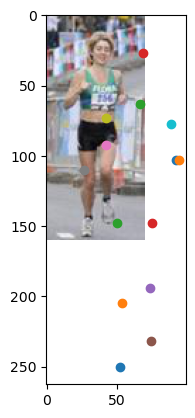

In [33]:
plt.imshow(images[0].movedim(0, -1))
for point in keypoints[0]:
    plt.scatter(x=point[0], y=point[1])

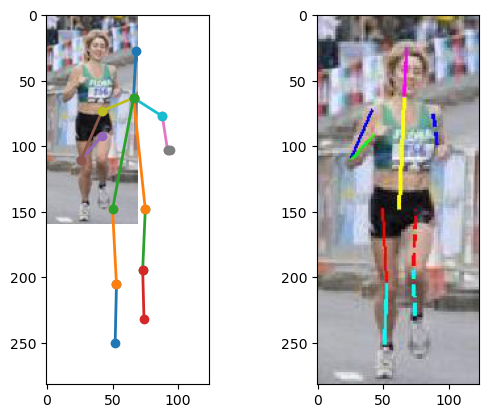

In [38]:
pose = keypoints[0]
plt.subplot(121, aspect='equal')
ax1 = plt.subplot(121, aspect='equal')
plt.imshow(images[0].movedim(0, -1))
for i, j in [(0, 1), (1, 2), (3, 4), (4, 5), (6, 7), (7, 8), (9, 10), (10, 11), (8, 12), (9, 12), (12, 13), (3, 12), (2, 12)]:
    plt.plot([pose[i][0], pose[j][0]], [pose[i][1], pose[j][1]], '-o', lw=2)

plt.subplot(122, aspect='equal', sharex=ax1, sharey=ax1)
plt.imshow(true[0])